In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm

import nltk
nltk.download('punkt')

from nltk.translate.bleu_score import corpus_bleu
from rouge_score import rouge_scorer

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# ROOT PATHS (relative to notebooks folder)
IMAGES_DIR = "../dataset/Images"
CAPTIONS_FILE = "../dataset/captions.txt"

# MODELS
MODEL_PATH = "../saved_models2/saved_models/best_model_trans.h5"
FEATURE_EXTRACTOR_PATH = "../saved_models2/saved_models/final_model_trans.h5"
TOKENIZER_PATH = "../saved_models2/saved_models/tokenizer_trans.pkl"

image_size = 224
max_length = 34



In [3]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [4]:
import h5py

try:
    with h5py.File(MODEL_PATH, "r") as f:
        print("✅ File bisa dibuka")
        print("Isi key dalam file:")
        print(list(f.keys()))
except Exception as e:
    print("❌ File rusak / tidak valid")
    print("Error:", e)


✅ File bisa dibuka
Isi key dalam file:
['model_weights', 'optimizer_weights']


In [5]:
with h5py.File(MODEL_PATH, "r") as f:
    print("Ada model_config?", "model_config" in f.attrs)


Ada model_config? True


In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from keras.models import load_model


In [7]:
import h5py

with h5py.File(MODEL_PATH, "r") as f:
    print("Keys:", list(f.keys()))
    print("Attrs:", list(f.attrs.keys()))


Keys: ['model_weights', 'optimizer_weights']
Attrs: ['backend', 'keras_version', 'model_config', 'training_config']


In [10]:
import os
print(os.path.getsize(MODEL_PATH) / (1024 * 1024), "MB")



126.06977462768555 MB


In [11]:
pip show h5py


Name: h5py
Version: 3.15.1
Summary: Read and write HDF5 files from Python
Home-page: 
Author: 
Author-email: Andrew Collette <andrew.collette@gmail.com>
License: 
Location: c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: numpy
Required-by: keras, tensorflow
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip uninstall h5py -y


Found existing installation: h5py 3.15.1
Uninstalling h5py-3.15.1:
  Successfully uninstalled h5py-3.15.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\cli\base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_ven

In [14]:
pip install h5py==3.9.0

                                              0.0/2.7 MB ? eta -:--:--
                                              0.1/2.7 MB 1.7 MB/s eta 0:00:02
     --                                       0.1/2.7 MB 1.7 MB/s eta 0:00:02
     ---                                      0.2/2.7 MB 2.1 MB/s eta 0:00:02
     -----                                    0.3/2.7 MB 2.2 MB/s eta 0:00:02
     -------                                  0.5/2.7 MB 2.3 MB/s eta 0:00:01
     ---------                                0.6/2.7 MB 2.5 MB/s eta 0:00:01
     ----------                               0.7/2.7 MB 2.6 MB/s eta 0:00:01
     -------------                            0.9/2.7 MB 2.7 MB/s eta 0:00:01
     ---------------                          1.0/2.7 MB 2.8 MB/s eta 0:00:01
     ------------------                       1.2/2.7 MB 2.8 MB/s eta 0:00:01
     -------------------                      1.3/2.7 MB 2.7 MB/s eta 0:00:01
     -------------------                      1.3/2.7 MB 2.7 MB/s eta 0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.20.0 requires h5py>=3.11.0, but you have h5py 3.9.0 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
pip uninstall tensorflow keras -y

Found existing installation: tensorflow 2.20.0
Uninstalling tensorflow-2.20.0:
  Successfully uninstalled tensorflow-2.20.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\cli\base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_ven

In [18]:
pip install tensorflow==2.12.0 keras==2.12.0 h5py==3.9.0

                                              0.0/1.7 MB ? eta -:--:--
     --                                       0.1/1.7 MB 2.6 MB/s eta 0:00:01
     ---------                                0.4/1.7 MB 5.0 MB/s eta 0:00:01
     ---------------                          0.7/1.7 MB 5.3 MB/s eta 0:00:01
     ----------------                         0.7/1.7 MB 5.0 MB/s eta 0:00:01
     -----------------                        0.8/1.7 MB 3.5 MB/s eta 0:00:01
     -------------------                      0.8/1.7 MB 3.3 MB/s eta 0:00:01
     ---------------------                    0.9/1.7 MB 2.9 MB/s eta 0:00:01
     ------------------------                 1.1/1.7 MB 3.1 MB/s eta 0:00:01
     ------------------------                 1.1/1.7 MB 3.1 MB/s eta 0:00:01
     ----------------------------             1.2/1.7 MB 2.7 MB/s eta 0:00:01
     ----------------------------             1.2/1.7 MB 2.7 MB/s eta 0:00:01
     --------------------------------         1.4/1.7 MB 2.6 MB/s eta 0

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    jaxlib<=0.4.38,>=0.4.38 from https://files.pythonhosted.org/packages/cc/24/a9c571c8a189f58e0b54b14d53fc7f5a0a06e4f1d7ab9edcf8d1d91d07e7/jaxlib-0.4.38-cp311-cp311-win_amd64.whl (from jax>=0.3.15->tensorflow-intel==2.12.0->tensorflow==2.12.0):
        Expected sha256 35226968fc9de6873d1571670eac4117f5ed80e955f7a1775204d1044abe16c6
             Got        26103692c4056c9cfe55079b4fad079f8111a85d73fbfca1da343a7c6f0200c3


[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from tensorflow.keras.models import load_model
from tensorflow.keras.layers import DepthwiseConv2D

class DepthwiseConv2DWrapper(DepthwiseConv2D):
    def __init__(self, *args, **kwargs):
        kwargs.pop("groups", None)
        super().__init__(*args, **kwargs)

print("Loading...")

model = load_model(
    MODEL_PATH,
    custom_objects={"DepthwiseConv2D": DepthwiseConv2DWrapper},
    compile=False
)

print("Done!")


Loading...


KeyboardInterrupt: 

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import DepthwiseConv2D

class DepthwiseConv2DWrapper(DepthwiseConv2D):
    def __init__(self, *args, **kwargs):
        kwargs.pop("groups", None)
        super().__init__(*args, **kwargs)

import time
print("Starting model load...")
start = time.time()

caption_model = load_model(
    MODEL_PATH,
    custom_objects={"DepthwiseConv2D": DepthwiseConv2DWrapper},
    compile=False
)

end = time.time()
print("Done in", end - start, "seconds")


Starting model load...


KeyboardInterrupt: 

In [ ]:
with h5py.File(MODEL_PATH, "r") as f:
    print("Backend:", f.attrs["backend"])


Keras version in file: 2.15.0
Backend: tensorflow


In [ ]:

feature_extractor = load_model(FEATURE_EXTRACTOR_PATH,
                               custom_objects={"DepthwiseConv2D": DepthwiseConv2DWrapper})


In [ ]:
import csv

def load_references(caption_file):
    references = {}

    with open(caption_file, 'r', encoding='utf-8') as f:
        reader = csv.DictReader(f)

        for row in reader:
            image_name = row["image"]
            caption = row["caption"].lower()

            if image_name not in references:
                references[image_name] = []

            references[image_name].append(caption)

    return references

references_dict = load_references(CAPTIONS_FILE)

print("Total Images:", len(references_dict))


Total Images: 8091


In [ ]:
import os

print(os.path.exists("../dataset/captions.txt"))
print(os.path.exists("../dataset/Images"))


True
True


In [ ]:
def generate_caption(image_path):
    img = load_img(image_path, target_size=(image_size, image_size))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    feature = feature_extractor.predict(img, verbose=0)

    in_text = "startseq"

    for _ in range(max_length):
        seq = tokenizer.texts_to_sequences([in_text])[0]
        seq = pad_sequences([seq], maxlen=max_length)

        yhat = caption_model.predict([feature, seq], verbose=0)
        yhat_idx = np.argmax(yhat)
        word = tokenizer.index_word.get(yhat_idx)

        if word is None:
            break

        in_text += " " + word
        if word == "endseq":
            break

    caption = in_text.replace("startseq", "").replace("endseq", "").strip()
    return caption


In [ ]:
references_dict = load_references(caption_file)

print("Total images:", len(references_dict))
print("Sample:", list(references_dict.items())[:1])


Total images: 8091
Sample: [('1000268201_693b08cb0e.jpg', ['a child in a pink dress is climbing up a set of stairs in an entry way .', 'a girl going into a wooden building .', 'a little girl climbing into a wooden playhouse .', 'a little girl climbing the stairs to her playhouse .', 'a little girl in a pink dress going into a wooden cabin .'])]


In [ ]:
y_true = []
y_pred = []

print("Generating captions...")

for image_name in tqdm(references_dict.keys()):
    img_path = os.path.join(IMAGES_DIR, image_name)

    if not os.path.exists(img_path):
        continue

    try:
        pred_caption = generate_caption(img_path)
        refs = references_dict[image_name]

        y_true.append([r.split() for r in refs])  # list of reference captions
        y_pred.appen'[d(pred_caption.split())

    except Exception as e:
        print(f"Error on {image_name}:", e)


Generating captions...


100%|██████████| 8091/8091 [9:44:57<00:00,  4.34s/it]       


In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.meteor_score import meteor_score
from rouge_score import rouge_scorer
import numpy as np

# ----- BLEU -----
bleu1 = corpus_bleu(y_true, y_pred, weights=(1, 0, 0, 0))
bleu2 = corpus_bleu(y_true, y_pred, weights=(0.5, 0.5, 0, 0))
bleu3 = corpus_bleu(y_true, y_pred, weights=(1/3, 1/3, 1/3, 0))
bleu4 = corpus_bleu(y_true, y_pred, weights=(0.25, 0.25, 0.25, 0.25))


In [ ]:
print("\nBLEU Scores:")
print(f"  BLEU-1:  {bleu1:.4f}")
print(f"  BLEU-2:  {bleu2:.4f}")
print(f"  BLEU-3:  {bleu3:.4f}")
print(f"  BLEU-4:  {bleu4:.4f}")



BLEU Scores:
  BLEU-1:  0.4869
  BLEU-2:  0.3028
  BLEU-3:  0.1802
  BLEU-4:  0.1040


In [ ]:
meteor_scores = []
for refs, hyp in zip(y_true, y_pred):
    meteor_scores.append(meteor_score(refs, hyp))

meteor_avg = np.mean(meteor_scores)
print(f"\nMETEOR:   {meteor_avg:.4f}")



METEOR:   0.2678


In [ ]:
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

precisions, recalls, f1s = [], [], []

for refs, hyp in zip(y_true, y_pred):
    hyp_text = " ".join(hyp)

    best_p, best_r, best_f = 0, 0, 0
    for ref in refs:
        ref_text = " ".join(ref)
        s = scorer.score(ref_text, hyp_text)['rougeL']

        best_p = max(best_p, s.precision)
        best_r = max(best_r, s.recall)
        best_f = max(best_f, s.fmeasure)

    precisions.append(best_p)
    recalls.append(best_r)
    f1s.append(best_f)

In [ ]:
print("\nROUGE-L Scores:")
print(f"  Precision: {np.mean(precisions):.4f}")
print(f"  Recall:    {np.mean(recalls):.4f}")
print(f"  F1-Score:  {np.mean(f1s):.4f}")



ROUGE-L Scores:
  Precision: 0.4394
  Recall:    0.3413
  F1-Score:  0.3625


In [ ]:
import pandas as pd

df = pd.DataFrame({
    "Metric": ["BLEU-1", "BLEU-2", "BLEU-3", "BLEU-4", "METEOR", "ROUGE-L (F1)"],
    "Score": [bleu1, bleu2, bleu3, bleu4, meteor_avg, np.mean(f1s)]
})

print("\n===== MODEL EVALUATION RESULTS =====\n")
display(df)



===== MODEL EVALUATION RESULTS =====



,Metric,Score
0,BLEU-1,0.486853
1,BLEU-2,0.302802
2,BLEU-3,0.180215
3,BLEU-4,0.104021
4,METEOR,0.267836
5,ROUGE-L (F1),0.362453


In [ ]:
import os

image_paths = []

for fname in os.listdir(IMAGES_DIR):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        full_path = os.path.join(IMAGES_DIR, fname)
        if os.path.exists(full_path):
            image_paths.append(full_path)

print("Total images found:", len(image_paths))
print("First 5 images:", image_paths[:5])


Total images found: 8091
First 5 images: ['../dataset/Images\\1000268201_693b08cb0e.jpg', '../dataset/Images\\1001773457_577c3a7d70.jpg', '../dataset/Images\\1002674143_1b742ab4b8.jpg', '../dataset/Images\\1003163366_44323f5815.jpg', '../dataset/Images\\1007129816_e794419615.jpg']


In [ ]:
import random

def show_samples(n=5):
    if not image_paths:
        print("❌ No images found")
        return

    sample_paths = random.sample(image_paths, n)

    for img_path in sample_paths:
        img_name = os.path.basename(img_path)

        pred = generate_caption(img_path)
        refs = references_dict.get(img_name, [])

        print("\nImage:", img_name)
        print("References:")
        for r in refs[:3]:
            print(" -", r)

        print("Prediction:")
        print(" >", pred)
        print("-" * 50)


In [ ]:
show_samples(5)



Image: 3538527033_df13112d51.jpg
References:
 - there are three women wearing different dresses and headbands dancing in the street .
 - three girls dressed up dancing on city street
 - three women dance down the city street .
Prediction:
 > two people are standing in front of the street
--------------------------------------------------

Image: 3437107047_715c60e9c8.jpg
References:
 - two girls talk and laugh together .
 - two ladys laugh and smile .
 - two smiling young women in brown converse .
Prediction:
 > woman in black and white shirt and black shirt and woman in black and white and black and white and black and white and black and white and white
--------------------------------------------------

Image: 53043785_c468d6f931.jpg
References:
 - a man is standing on an animal in the water .
 - a man is standing on an elephant lying in some water .
 - a man standing on a rock in a river with a spash next to him .
Prediction:
 > two children are playing in the water
--------------

In [ ]:
print("Images loaded:", len(image_paths))
print("References loaded:", len(references_dict))


Images loaded: 8091
References loaded: 8091


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

def show_samples(n=5):
    if not image_paths:
        print("❌ No images found")
        return

    sample_paths = random.sample(image_paths, n)

    for img_path in sample_paths:
        img_name = os.path.basename(img_path)

        # Generate caption
        pred = generate_caption(img_path)
        refs = references_dict.get(img_name, [])

        # --- Display image ---
        img = Image.open(img_path)

        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis("off")

        # --- Title (Prediction) ---
        plt.title(f"PREDICTED:\n{pred}", fontsize=12)

        plt.show()

        # --- Print reference captions ---
        print("Image filename:", img_name)
        print("Reference captions:")
        for r in refs[:3]:
            print(" -", r)

        print("\nPredicted caption:")
        print(" >", pred)
        print("=" * 60)


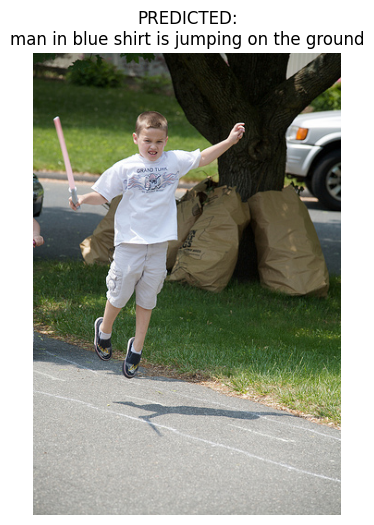

Image filename: 3568065409_1c381aa854.jpg
Reference captions:
 - a boy holding a lightsaber jumps in the middle of the street .
 - a boy holding a stick jumping ont he street .
 - a boy in shorts and white shirt is jumping whilst holding a pink stick in front of a large tree surrounded by sacks .

Predicted caption:
 > man in blue shirt is jumping on the ground


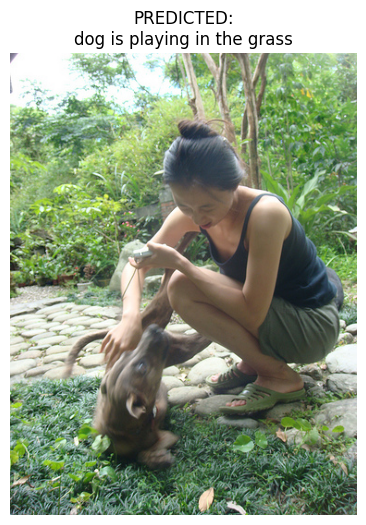

Image filename: 3518608016_46453d8b18.jpg
Reference captions:
 - a woman is petting a dog outside .
 - a woman is petting her dog near a stone path .
 - a woman playing with a brown dog on a garden path .

Predicted caption:
 > dog is playing in the grass


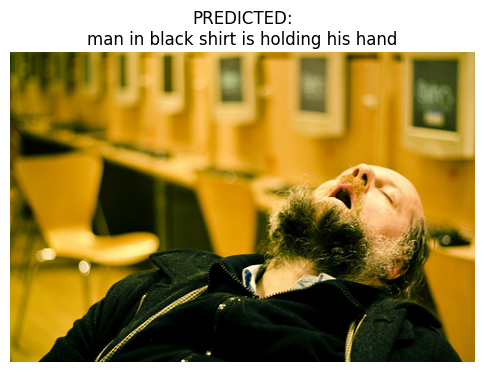

Image filename: 3231596071_f0c522a639.jpg
Reference captions:
 - a bearded man takes a nap .
 - a man has fallen asleep with his mouth open .
 - a man snoring

Predicted caption:
 > man in black shirt is holding his hand


In [ ]:
show_samples(3)
